In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from utility.types import (
    RebalanceFrequencyEnum,
    AllocationMethodsEnum,
    RegimeDetectionModels,
)

from data.universe import Universe
from data.benchmark import Benchmark

from backtest.backtest import Backtester

In [2]:
bench_obj = Benchmark(RebalanceFrequencyEnum.MONTH_END)
bench_obj.benchmark_perf

2016-05-19    1.000000
2016-05-20    1.000000
2016-05-23    1.000000
2016-05-24    1.000000
2016-05-25    1.000000
                ...   
2024-03-01    1.658112
2024-03-04    1.661620
2024-03-05    1.655421
2024-03-06    1.660339
2024-03-07    1.671945
Freq: B, Name: benchmark_perf, Length: 2036, dtype: float64

In [3]:
univ_obj = Universe(keep_only_benchmark_universe=True)
universe = univ_obj.get_universe_returns()
universe

,SX5T,SPTR500N,ESTR_ETF
2016-05-24,0.000000,0.000000,0.000000
2016-05-25,0.000000,0.000000,0.000000
2016-05-26,0.000000,0.000000,0.000000
2016-05-27,0.000000,0.000000,0.000000
2016-05-30,0.000000,0.000000,0.000000
...,...,...,...
2024-03-01,0.001428,0.005785,0.000000
2024-03-04,0.004018,0.000539,0.000000
2024-03-05,-0.004131,-0.008862,0.000392
2024-03-06,0.005315,0.001269,0.000196



-------  Returns statistical information  --------
Expected return annualized: 9.14 % vs 6.97 % (benchmark)
CAGR: 8.66 % vs 6.42 % (benchmark)
Expected volatility annualized: 12.51 % vs 11.76 % (benchmark)
Specific volatility (diversifiable) annualized: 2.75 %
Systematic volatility annualized: 12.21 %
Skewness: -0.52 vs -0.63 (benchmark), <0 = left tail, >0 = right tail
Kurtosis: 5.30 vs -0.63 (benchmark) , >3 = fat tails, <3 = thin tails
95%-VaR: -1.23 % vs -1.12 % (benchmark) -> the lower the better
95%-CVaR: -1.93 % vs -1.84 % (benchmark) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -25.49 % vs -25.88 % (benchmark)
Kelly criterion: 6.80 % vs 5.83 % (benchmark)
Benchmark sensitivity (beta): 1.04 vs 1 (benchmark)
Determination coefficient R²: 0.95
Tracking error annualized: 2.79 %

---------------  Strategy ratios  ----------------
No risk free rate considered for the following ratios.

Sharpe ratio annualized: 0.73 vs 0.59 (benchmark)
Sor

c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


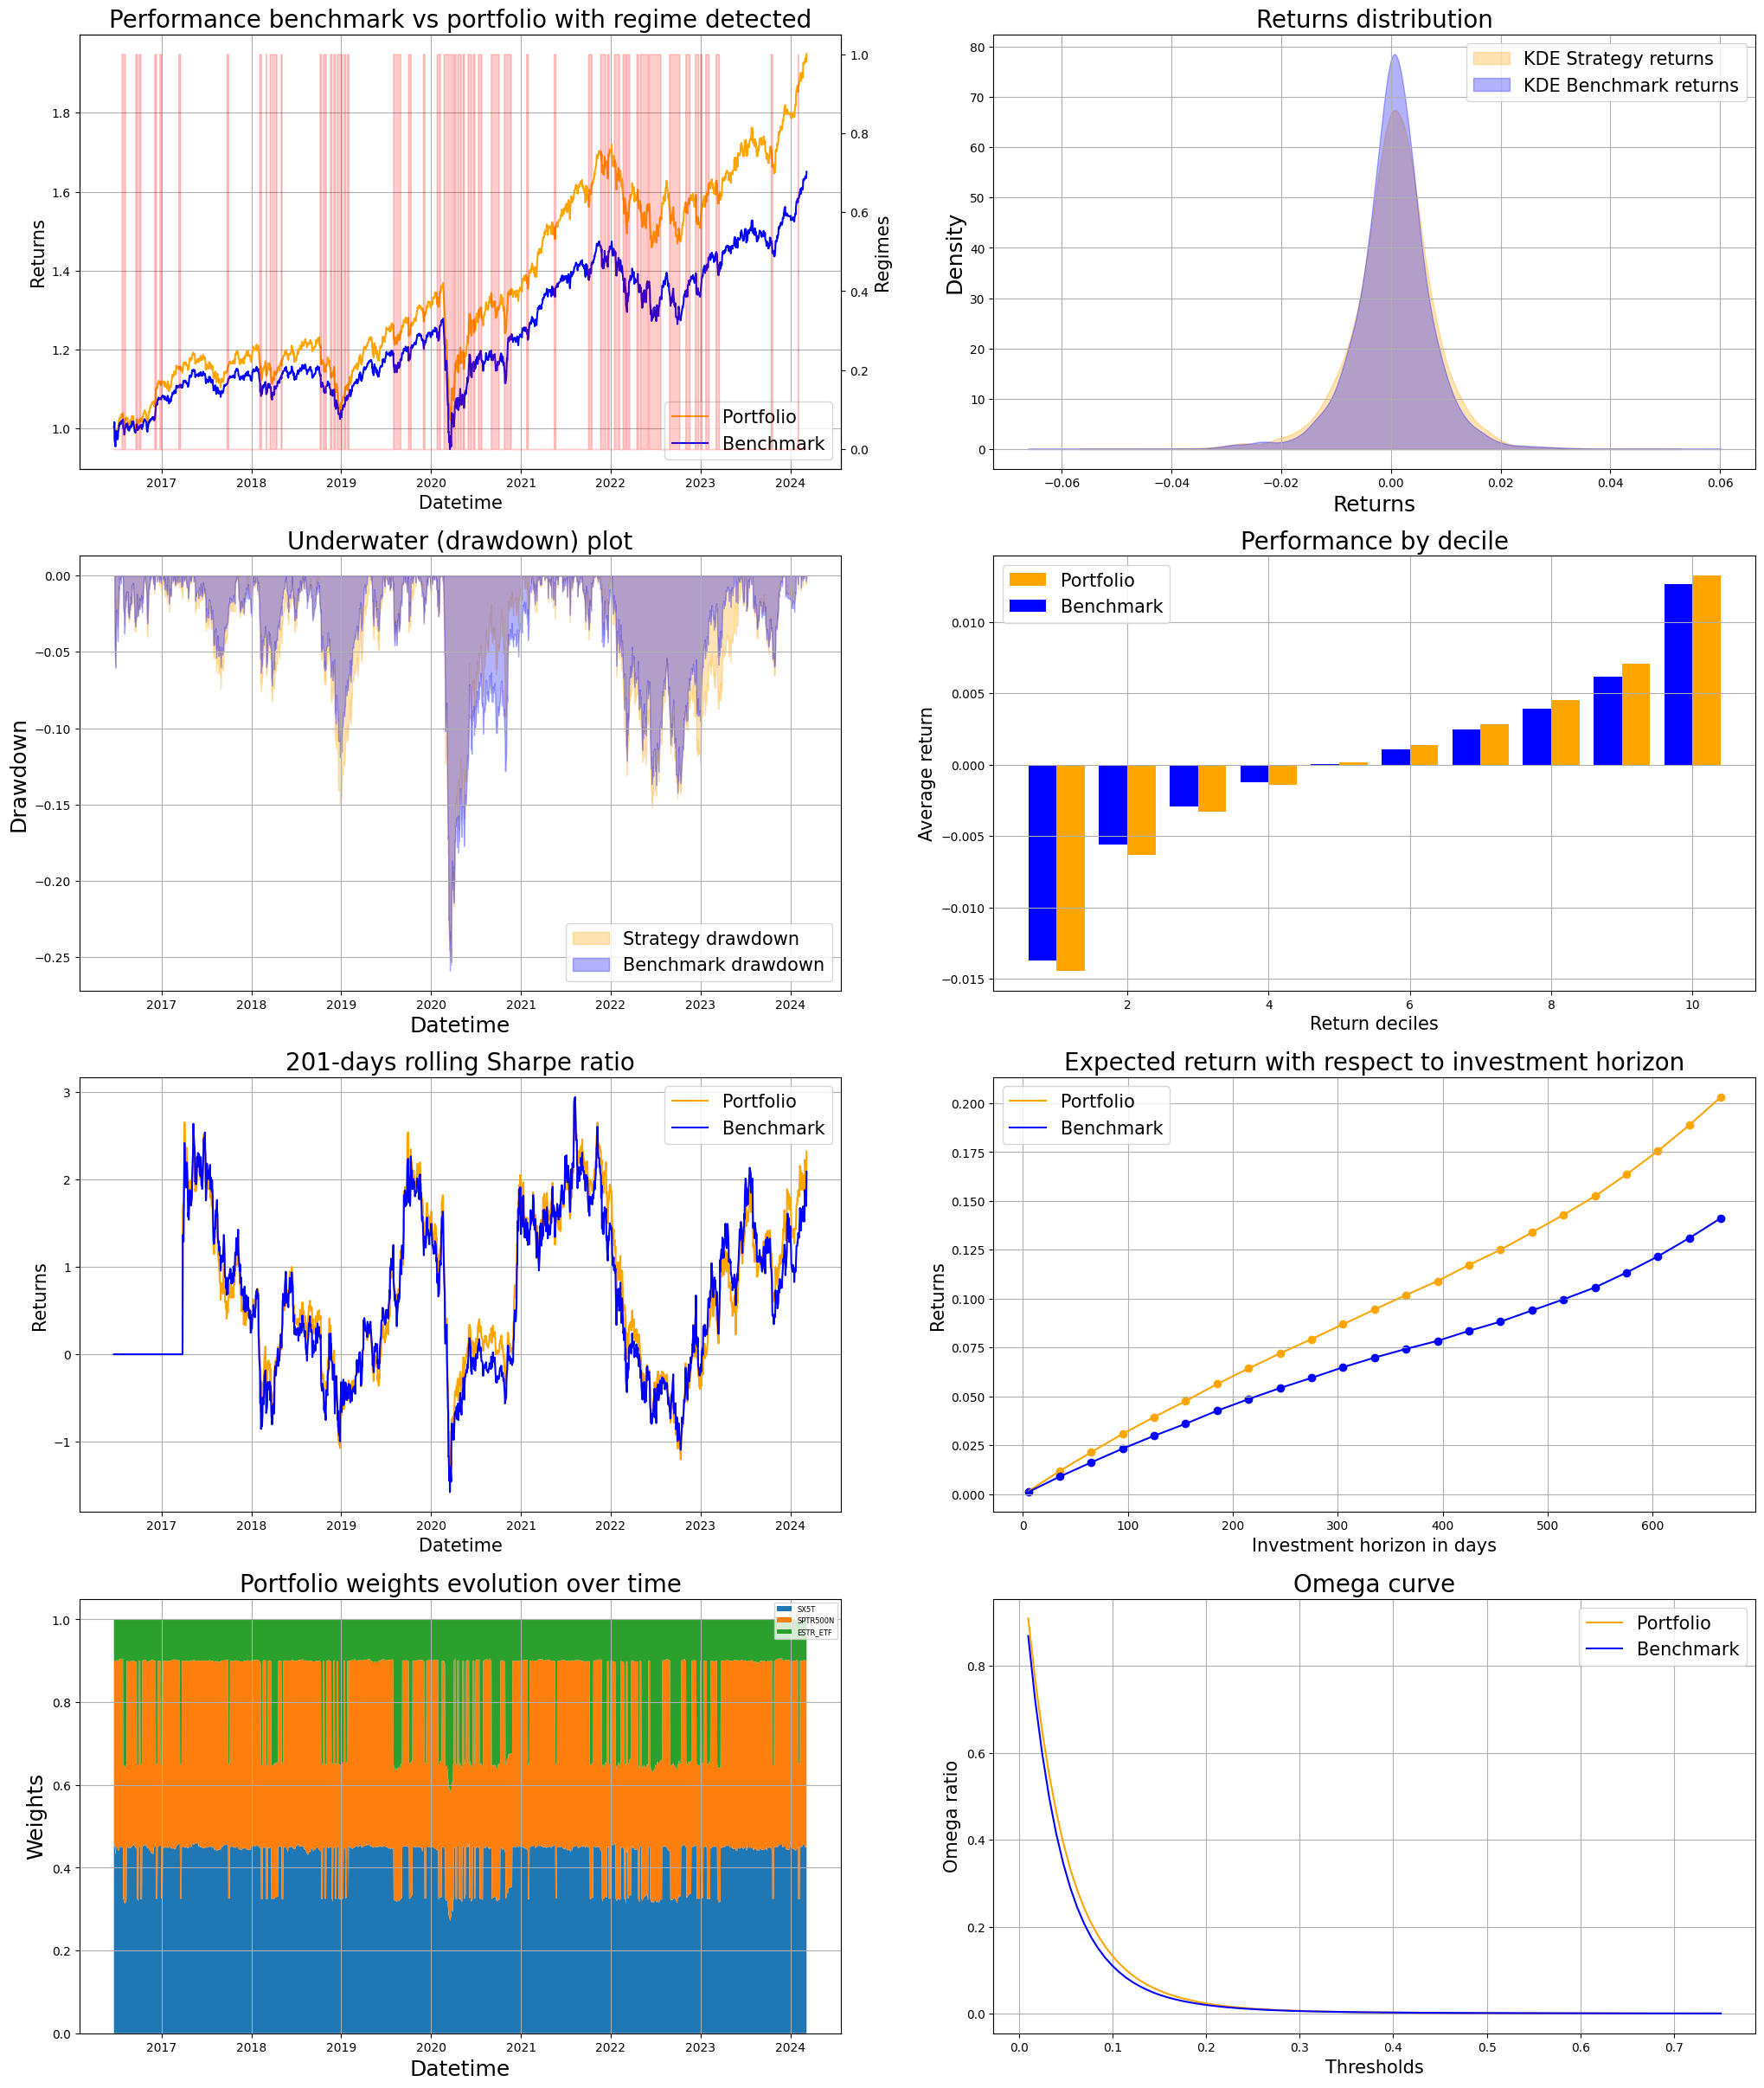

In [4]:
bk_tester = Backtester(
    universe_returns=univ_obj.get_universe_returns(),
    market_returns=univ_obj.get_universe_returns()["SPTR500N"],
    benchmark_returns=bench_obj.benchmark_returns,
)


ptf_and_bench, ptf_weights_equal_weight, regimes, metrics_df = bk_tester.run_backtest(
    allocation_type=AllocationMethodsEnum.EQUALLY_WEIGHTED,
    rebalance_frequency=RebalanceFrequencyEnum.MONTH_END,
    market_regime_model=RegimeDetectionModels.HIDDEN_MARKOV_MODEL,
    bearish_leverage_by_securities={k: 1 for k in universe.columns},
    bullish_leverage_by_securities={k: 1 for k in universe.columns},
    verbose=False,
)

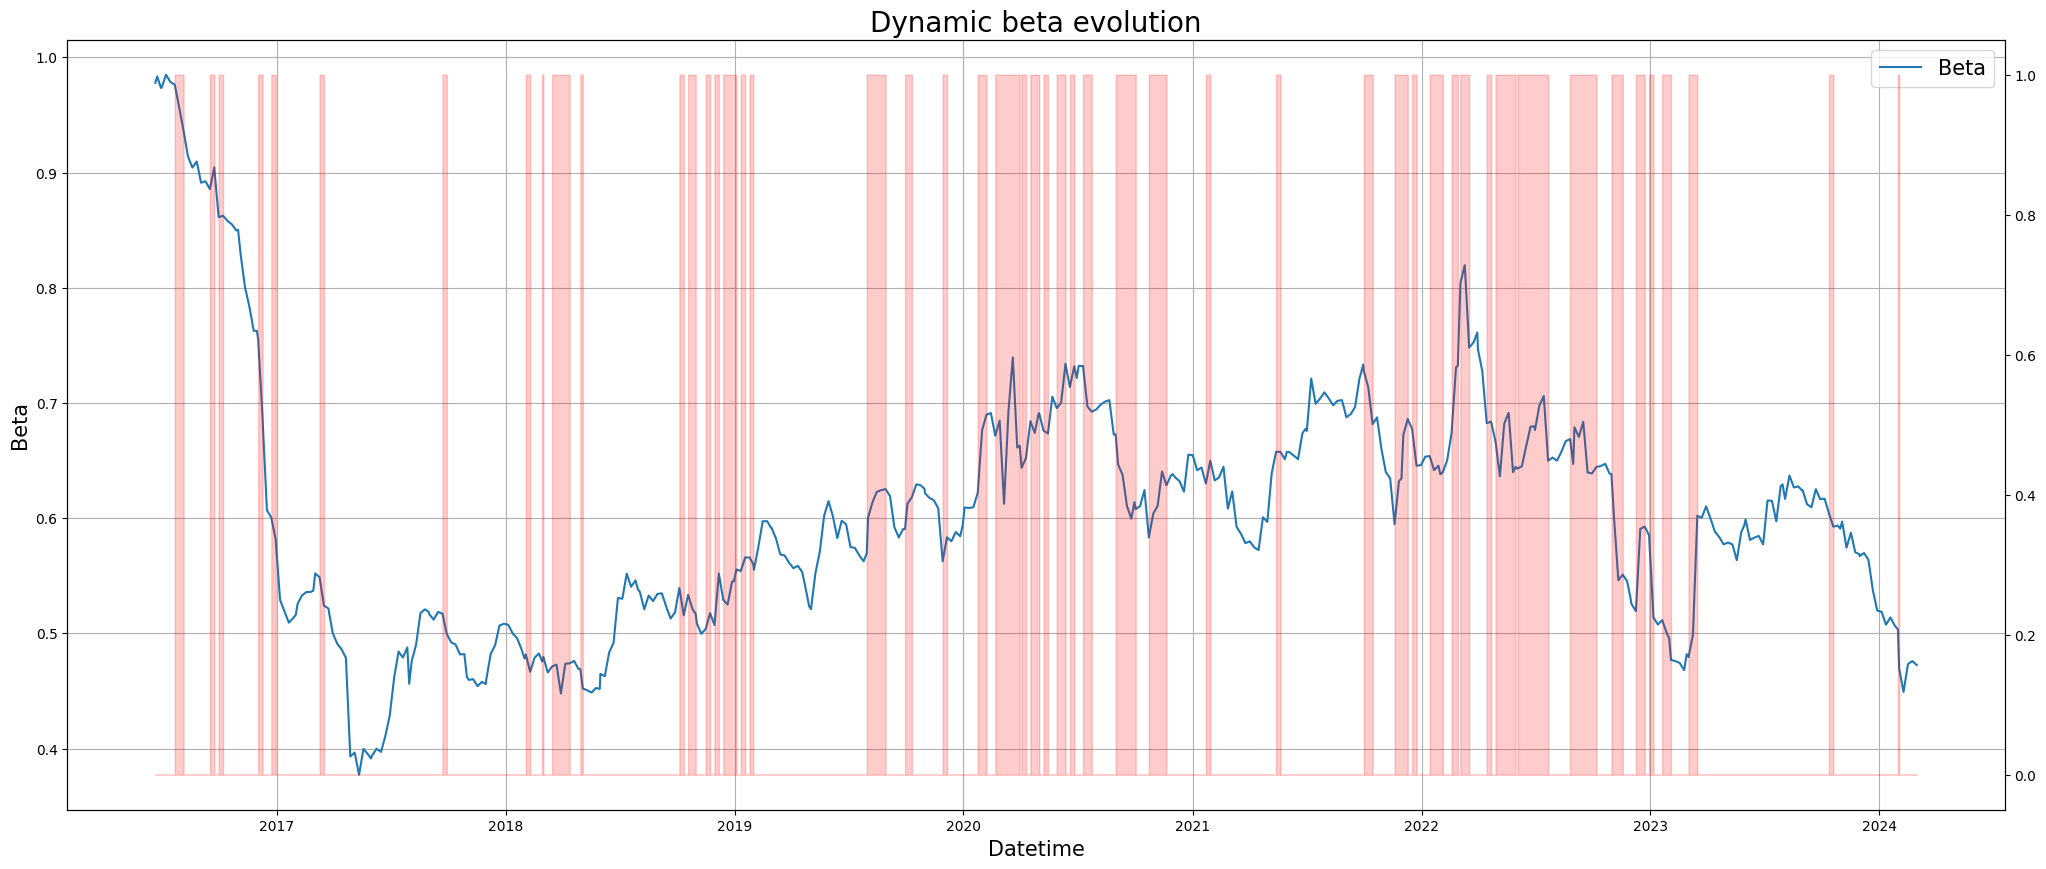

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))


ax.plot(regimes.index, regimes.next_beta, label="Beta")
ax_l = ax.twinx()
ax_l.fill_between(
    regimes.index,
    regimes["Regime"],
    alpha=0.2,
    color="red",
    step="pre",
)
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Beta", fontsize=15)
ax.set_title(f"Dynamic beta evolution", fontsize=20)
ax.grid()
ax.legend(fontsize=15)